In [ ]:
import keras.models
!pip install sklearn tensorflow

In [2]:
import numpy as np
import os
import constants as cs
import yaml
import globali as gg

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [4]:
def read_yaml_fields():
    with open(cs.YAMLFILE, 'r') as ff:
        content = yaml.safe_load(ff)
        a = set(content.get('actions', []))
        c = content.get('counter', {})
        return a, c


In [5]:
gg.actions, gg.counters = read_yaml_fields()

In [6]:
display(len(gg.actions))
display(gg.actions)
display(gg.counters)

27

{'a',
 'b',
 'c',
 'cinque',
 'd',
 'due',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'nove',
 'o',
 'otto',
 'p',
 'q',
 'quattro',
 'sei',
 'sette',
 'tre',
 'uno',
 'zero'}

{'a': 100,
 'b': 100,
 'c': 100,
 'cinque': 100,
 'd': 100,
 'due': 100,
 'e': 100,
 'f': 100,
 'g': 100,
 'h': 100,
 'i': 100,
 'j': 100,
 'k': 100,
 'l': 100,
 'm': 100,
 'n': 100,
 'nove': 100,
 'o': 100,
 'otto': 100,
 'p': 100,
 'q': 100,
 'quattro': 100,
 'sei': 100,
 'sette': 100,
 'tre': 100,
 'uno': 100,
 'zero': 100}

In [7]:
label_map = {label:num for num, label in enumerate(gg.actions)}

In [8]:
label_map

{'nove': 0,
 'due': 1,
 'j': 2,
 'k': 3,
 'quattro': 4,
 'q': 5,
 'sei': 6,
 'n': 7,
 'e': 8,
 'd': 9,
 'h': 10,
 'uno': 11,
 'f': 12,
 'sette': 13,
 'a': 14,
 'g': 15,
 'b': 16,
 'c': 17,
 'cinque': 18,
 'l': 19,
 'm': 20,
 'o': 21,
 'tre': 22,
 'zero': 23,
 'otto': 24,
 'i': 25,
 'p': 26}

In [9]:
sequences, labels = [], []

for action in tqdm(gg.actions, desc="Processing Actions"):
    for sequence in range(gg.counters[action]):
        window = []
        for frame_num in range(cs.NUM_FRAME):
            res = np.load(os.path.join(cs.KEYPOINTS_FOLDER, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])


Processing Actions: 100%|██████████| 27/27 [00:39<00:00,  1.45s/it]


In [10]:
np.array(sequences).shape       # 15 videos, 30 frames, 1662 features

(2700, 30, 1662)

In [11]:
np.array(labels).shape

(2700,)

In [12]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [13]:
X = np.array(sequences)

In [14]:
X.shape

(2700, 30, 1662)

In [15]:
y = to_categorical(labels).astype(int)

In [16]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [18]:
y_test.shape

(135, 27)

### Build and Train LSTM Natural Network

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import CSVLogger
import datetime

In [20]:
csv_logger = CSVLogger('./logs/csv/training_log_cell_lstm_27classes.csv', append=True)

In [21]:
# Configura il callback di TensorBoard
# log_dir = os.path.join(os.getcwd(), "logs", "fit", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
log_dir = "D:/PROVA" #os.path.join("./logs", "AAA")
os.makedirs(log_dir, exist_ok=True)
log_dir = log_dir + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [30]:
# LSTM

np_actions = np.array(list(gg.actions))
print(np_actions.shape[0])
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30, 1662)))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(np_actions.shape[0], activation='softmax'))


27


In [32]:
# LOAD MODEL

# del model
model = Sequential()
model = model.load_weights('./models/old/final_model.h5')


ValueError: Unable to load weights saved in HDF5 format into a subclassed Model which has not created its variables yet. Call the Model first, then load the weights.

In [57]:
# GRU

np_actions = np.array(list(gg.actions))
print(np_actions.shape[0])
model = Sequential()
model.add(GRU(64, return_sequences=True, activation='tanh', input_shape=(30, 1662)))
model.add(Dropout(0.2))
model.add(GRU(128, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(GRU(64, return_sequences=False, activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(np_actions.shape[0], activation='softmax'))


27


In [23]:
# TRANSFORMERS


In [22]:
# Vecchio LSTM

np_actions = np.array(list(gg.actions))
print(np_actions.shape[0])
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(np_actions.shape[0], activation='softmax'))

5


In [31]:
res = [.7, 0.2, 0.1]

In [32]:
np_actions[np.argmax(res)]

'nove'

In [33]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [34]:
early_stopping = EarlyStopping(monitor='loss', patience=60, restore_best_weights=True)

In [35]:
FOLDER_MODEL = "cell_lstm_27_classes"

In [36]:
best_model_path = os.path.join(cs.MODELS_FOLDER, FOLDER_MODEL, 'best_model.h5') 
checkpoint = ModelCheckpoint(best_model_path, monitor='loss', save_best_only=True)

In [37]:
history = model.fit(X_train, y_train, epochs=3000, callbacks=[early_stopping, checkpoint, csv_logger])    # , callbacks=[tb_callback]
# save best model
final_model_path = os.path.join(cs.MODELS_FOLDER, FOLDER_MODEL, 'final_model.h5') 
model.save(final_model_path)

Epoch 1/3000
81/81 [==============================] - 16s 100ms/step - loss: 4.3823 - categorical_accuracy: 0.0413
Epoch 2/3000
 1/81 [..............................] - ETA: 8s - loss: 4.1072 - categorical_accuracy: 0.0625

C:\Users\Paolo\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


81/81 [==============================] - 8s 102ms/step - loss: 4.0556 - categorical_accuracy: 0.0487
Epoch 3/3000
81/81 [==============================] - 8s 99ms/step - loss: 3.8180 - categorical_accuracy: 0.0698
Epoch 4/3000
81/81 [==============================] - 8s 97ms/step - loss: 3.6282 - categorical_accuracy: 0.0776
Epoch 5/3000
81/81 [==============================] - 8s 98ms/step - loss: 3.4466 - categorical_accuracy: 0.0830
Epoch 6/3000
81/81 [==============================] - 9s 107ms/step - loss: 3.2864 - categorical_accuracy: 0.1103
Epoch 7/3000
81/81 [==============================] - 14s 174ms/step - loss: 3.1846 - categorical_accuracy: 0.1037
Epoch 8/3000
81/81 [==============================] - 11s 139ms/step - loss: 3.0653 - categorical_accuracy: 0.1115
Epoch 9/3000
81/81 [==============================] - 10s 126ms/step - loss: 2.9628 - categorical_accuracy: 0.1185
Epoch 10/3000
81/81 [==============================] - 9s 113ms/step - loss: 2.9021 - categorical_acc

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 dropout_4 (Dropout)         (None, 30, 64)            0         
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 dropout_5 (Dropout)         (None, 30, 128)           0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                      

### Make Predictions

In [39]:
res = model.predict(X_test)

5/5 [==============================] - 3s 23ms/step


In [40]:
np_actions[np.argmax(res[4])]

'a'

In [41]:
np_actions[np.argmax(y_test[4])]

'a'

In [38]:
# model.load_weights('action.h5')

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'action.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

### Evaluation using Confusion Matrix and Accuracy

In [34]:
# Caricare il modello salvato
# loaded_model = keras.models.load_model('models/best_model.h5')

In [42]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 30ms/step


In [43]:
y_true = np.argmax(y_test, axis=1).tolist()
y_pred = np.argmax(y_pred, axis=1).tolist()


In [44]:
len(y_true)

135

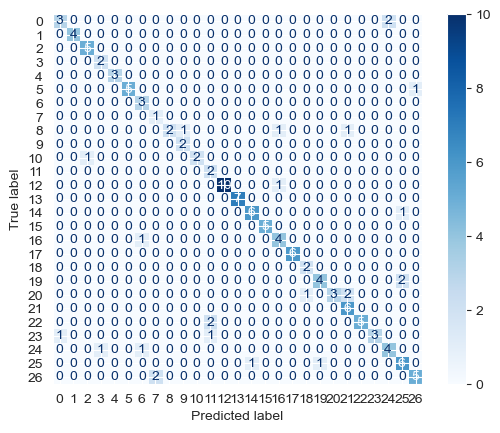

In [61]:
# CONFUSION MATRIX 

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# Personalizzare il plot con una scala di blu
fig, ax = plt.subplots()
disp.plot(ax=ax, cmap='Blues')
plt.show()


In [62]:
accuracy_score(y_true, y_pred)

0.8148148148148148